<a href="https://colab.research.google.com/github/Muthu2312/The_Sparks_Foundation/blob/main/ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author : Mutharasan M

##Task 2 : Prediction using Unsupervised Machine Learning

##GRIP @ The Sparks Foundation

Requried LIbraries

In [50]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA 

#Step 1 - Loading the dataset

In [108]:
iris = pd.read_csv("/content/drive/MyDrive/The Sparks Foundation/Task 2_Clustering/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#Step 2 - Data Preprocessing

In [109]:
iris.drop("Id",axis=1,inplace=True)

In [110]:
x = iris.drop("Species",axis=1)
y = iris["Species"]

In [111]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
y=pd.DataFrame(y)

In [113]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


#Step 3 - Visualizing the input data and its Hierarchy

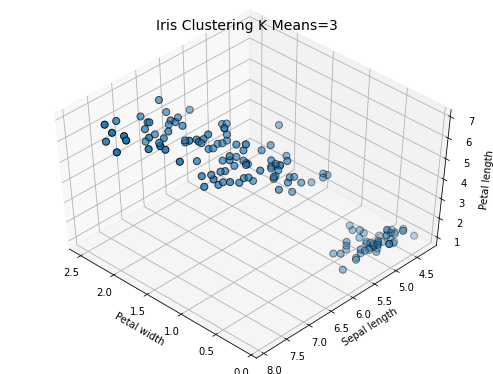

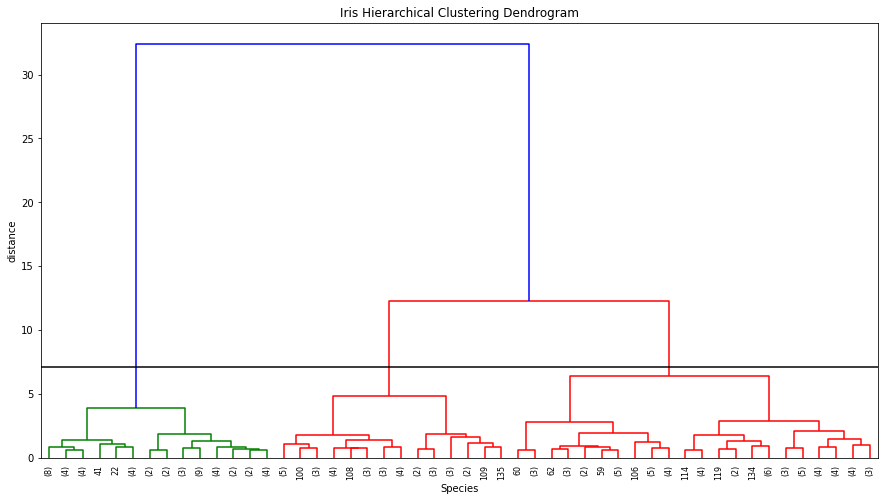

In [114]:
fig = plt.figure(1, figsize=(7,5))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x['PetalWidthCm'], x['SepalLengthCm'], x['PetalLengthCm'], edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering K Means=3", fontsize=14)
plt.show()

#Hierachy Clustering 
hier=linkage(x,"ward")
max_d=7.08
plt.figure(figsize=(15,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=50,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,     
)
plt.axhline(y=max_d, c='k')
plt.show()

#Step 4 - Model Training

In [115]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [116]:
y['Species'].replace(['Iris-setosa', 'Iris-versicolor','Iris-virginica'],
                        [0, 1, 2], inplace=True)

In [117]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [118]:
print(iris_k_mean_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [119]:
print(iris_k_mean_model.cluster_centers_)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


#Step 5 - Visualizing the Model Cluster

Text(0.5, 1.0, "Model's classification")

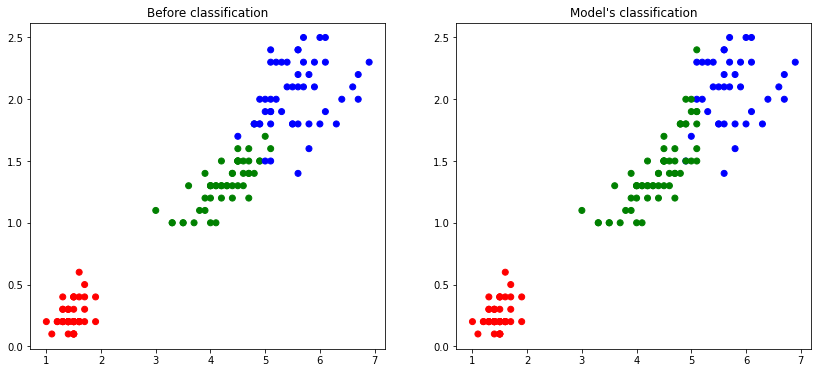

In [123]:
plt.figure(figsize=(14,6))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [0, 1, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[y['Species']])
plt.title('Before classification')

plt.subplot(1, 2, 2)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[predictedY])
plt.title("Model's classification")

#Step 6 - Calculating the Accuracy and Confusion Matrix

In [124]:
sm.accuracy_score(predictedY, y['Species'])

0.8933333333333333

In [125]:
sm.confusion_matrix(predictedY, y['Species'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

#Conclusion

I was able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to evaluate the model's clustering accuracy score.

                                                                     Thank you